In [2]:
import sys
from keras import applications
import json
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense
from keras import regularizers
import numpy as np
import h5py
import pandas as pd

sys.path.append("../") # go to parent dir
from mrcode.utils.file_utils import fileFinder, folderFinder
from mrcode import settings
from mrcode.preprocessing import experiment_data

data_path, log_path, experiment_data_path, model_path = settings.path_init()

# Loads the Inception-v3 final layer and creates a model from it
def load_predictions_model():
    model = applications.InceptionV3(include_top=True, weights='imagenet')
    layer_name = 'predictions'

    # Builds a model with output at the specified layer name
    input_layer = Input(shape=(2048,))
    output = model.get_layer(layer_name)(input_layer)
    model1 = Model(inputs=input_layer, outputs=output)
    return model1

C:\Toolkits\anaconda2-4.2.0\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from mrcode.utils.file_utils import folderFinder
from keras.models import load_model



def load_data():
    X_train, y_train, X_test, y_test, X_val, y_val = experiment_data.load_data(load_mode='raw', apply_smote=False, cnn_ready=True)
    return X_train, y_train, X_test, y_test, X_val, y_val


# Getting the log path where result models are stored
model_name1 = 'cnn_model_2d_1conv_drop05/normal'
log_path1 = settings.log_path_init() + model_name1 + '/'

# Load data
X_train1, y_train1, X_test1, y_test1, X_val1, y_val1 = load_data()
labels = folderFinder(settings.data_path_init() + '/images/')

# Loading the model
file_name = '2018.5.29_17.18.h5'
model1 = load_model(log_path1 + file_name)

============ Data Loaded ============
X_train shape: (9660, 550, 32, 1)
X_val shape: (345, 550, 32, 1)
X_test shape: (345, 550, 32, 1)
y_train shape: (9660, 1, 23)
y_val shape: (345, 1, 23)
y_test shape: (345, 1, 23)




In [ ]:
intermediate_layer_model.get_weights

In [23]:
model1.summary()

layer_name = 'relu3'

# Builds a model with output at the specified layer name
intermediate_layer_model = Model(inputs=model1.input,
                                     outputs=model1.get_layer(layer_name).output)
predictions1 = intermediate_layer_model.predict(X_test1, batch_size=32)
predictions1.shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 275, 32, 64)       384       
_________________________________________________________________
batch_norm1 (BatchNormalizat (None, 275, 32, 64)       256       
_________________________________________________________________
relu1 (Activation)           (None, 275, 32, 64)       0         
_________________________________________________________________
dropout1 (Dropout)           (None, 275, 32, 64)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 138, 16, 128)      8320      
_________________________________________________________________
batch_norm2 (BatchNormalizat (None, 138, 16, 128)      512       
_________________________________________________________________
relu2 (Activation)           (None, 138, 16, 128)      0         
__________

(345, 138, 16, 128)

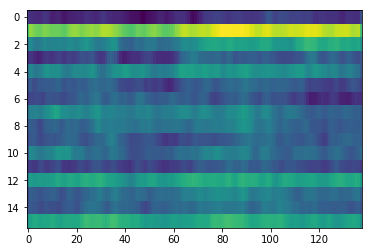

In [24]:
import matplotlib.pyplot as plt
plt.imshow(np.transpose(np.mean(predictions1[:, :, :, 31],0)), aspect='auto')
#plt.plot(predictions1[0, :, 0, :])
plt.show()